## Week 2, KNN

In [34]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
import statistics as st
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [17]:
df = pd.read_csv("wine.data", header=None)
X = df.iloc[:, 1:]
print(X.head())
y = df.iloc[:, 0]
print(y.head())
df.head()

      1     2     3     4    5     6     7     8     9     10    11    12  \
0  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

     13  
0  1065  
1  1050  
2  1185  
3  1480  
4   735  
0    1
1    1
2    1
3    1
4    1
Name: 0, dtype: int64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


1 : 0.7304761904761905
2 : 0.6625396825396825
3 : 0.7082539682539682
4 : 0.6577777777777778
5 : 0.6746031746031746
6 : 0.6742857142857143
7 : 0.68
8 : 0.68
9 : 0.7023809523809523
10 : 0.6801587301587302
11 : 0.7025396825396826
12 : 0.6966666666666667
13 : 0.690952380952381
14 : 0.6793650793650794
15 : 0.7019047619047619
16 : 0.6795238095238095
17 : 0.7015873015873015
18 : 0.6795238095238095
19 : 0.6793650793650794
20 : 0.690952380952381
21 : 0.7019047619047619
22 : 0.6965079365079365
23 : 0.7020634920634921
24 : 0.7076190476190476
25 : 0.7019047619047619
26 : 0.6965079365079365
27 : 0.6963492063492064
28 : 0.707936507936508
29 : 0.7134920634920635
30 : 0.707936507936508
31 : 0.690952380952381
32 : 0.7134920634920635
33 : 0.7134920634920635
34 : 0.7246031746031746
35 : 0.7246031746031746
36 : 0.7134920634920635
37 : 0.7134920634920635
38 : 0.7134920634920635
39 : 0.707936507936508
40 : 0.7077777777777778
41 : 0.7134920634920635
42 : 0.7077777777777778
43 : 0.7077777777777778
44 : 0.7077

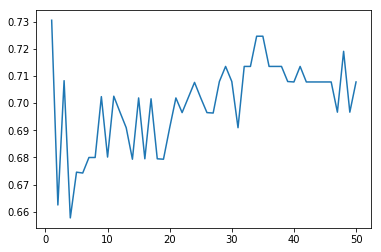

In [32]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
sc = []
for N in range(1, 51):
    scores = []
    for train_index, test_index in kf.split(X):
    #     print("TRAIN:", train_index, "\nTEST:", test_index)
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y[train_index], y[test_index]
        model = KNeighborsClassifier(n_neighbors=N, n_jobs=-1)
        model.fit(X_train, y_train)
        scores.append(model.score(X_test, y_test))
    print(N, ":", st.mean(scores))
    sc.append(st.mean(scores))
print("Best:", np.argmax(sc)+1, np.max(sc))
plt.plot(range(1, 51), sc);

1 : 0.9439682539682539
2 : 0.9328571428571428
3 : 0.9550793650793651
4 : 0.9382539682539682
5 : 0.9493650793650793
6 : 0.9495238095238095
7 : 0.9495238095238095
8 : 0.9552380952380952
9 : 0.9607936507936508
10 : 0.9607936507936508
11 : 0.9609523809523809
12 : 0.9552380952380952
13 : 0.9495238095238095
14 : 0.9663492063492063
15 : 0.9720634920634921
16 : 0.9720634920634921
17 : 0.9665079365079365
18 : 0.9665079365079365
19 : 0.9553968253968254
20 : 0.9665079365079365
21 : 0.9609523809523809
22 : 0.9665079365079365
23 : 0.9609523809523809
24 : 0.9552380952380952
25 : 0.9552380952380952
26 : 0.9607936507936508
27 : 0.9552380952380952
28 : 0.9663492063492063
29 : 0.9776190476190476
30 : 0.9607936507936508
31 : 0.9552380952380952
32 : 0.9607936507936508
33 : 0.9663492063492063
34 : 0.9663492063492063
35 : 0.9607936507936508
36 : 0.9607936507936508
37 : 0.9552380952380952
38 : 0.9607936507936508
39 : 0.9607936507936508
40 : 0.9607936507936508
41 : 0.9663492063492063
42 : 0.9607936507936508
4

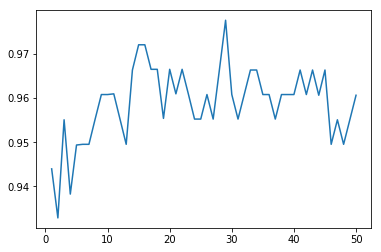

In [36]:
X = scale(X, axis=0, with_mean=True, with_std=True, copy=True)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
sc = []
for N in range(1, 51):
    scores = []
    for train_index, test_index in kf.split(X):
    #     print("TRAIN:", train_index, "\nTEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = KNeighborsClassifier(n_neighbors=N, n_jobs=-1)
        model.fit(X_train, y_train)
        scores.append(model.score(X_test, y_test))
    print(N, ":", st.mean(scores))
    sc.append(st.mean(scores))
print("Best:", np.argmax(sc)+1, np.max(sc))
plt.plot(range(1, 51), sc);